In [19]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# TD_05_1 - Modélisation

![exo](TD05.png)

1. On considère d’abord le système sans ressorts et sans frottements. Etablir l’équation différentielle dans le cas de l’approximation des petits angles. En utilisant la méthode d’Euler, tracer la valeur de l’angle Théta en fonction du temps. On prendra l = 0,6 m, m = 100 g. 
2. Etudier l’influence de l’angle de départ entre 10 et 50° tous les 10 degrés.
3. Tracer le portrait de phase pour un angle de 30°
4. Tracer également l’énergie cinétique et l’énergie potentielle au cours du temps dans ces conditions.

<IPython.core.display.Javascript object>


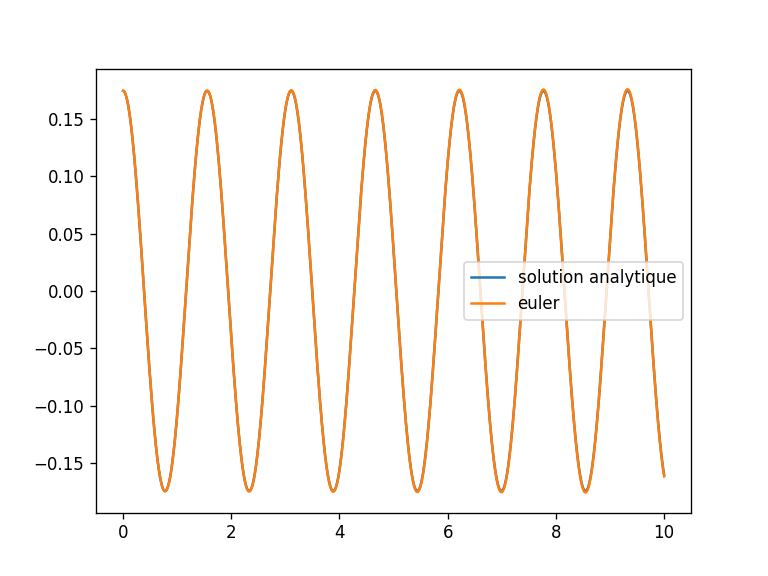

In [4]:
import matplotlib.pyplot as plt
from math import cos, pi , sin
%matplotlib notebook

def euler1(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    l = 0.6
    w0 = (g / l)**0.5
    
    while t[-1] < tmax:
        theta.append(theta[-1] + thetap[-1]*dt)
        thetap.append(thetap[-1] - w0**2*theta[-2]*dt)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

t,theta,thetap = euler1(10,0,10,0.0001)

sol = []
for val in t:
    sol.append(theta[0]*cos((9.81/0.6)**0.5*val))
    
plt.figure("euler1")
plt.clf()
plt.plot(t,sol,label="solution analytique")
plt.plot(t,theta,label="euler")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


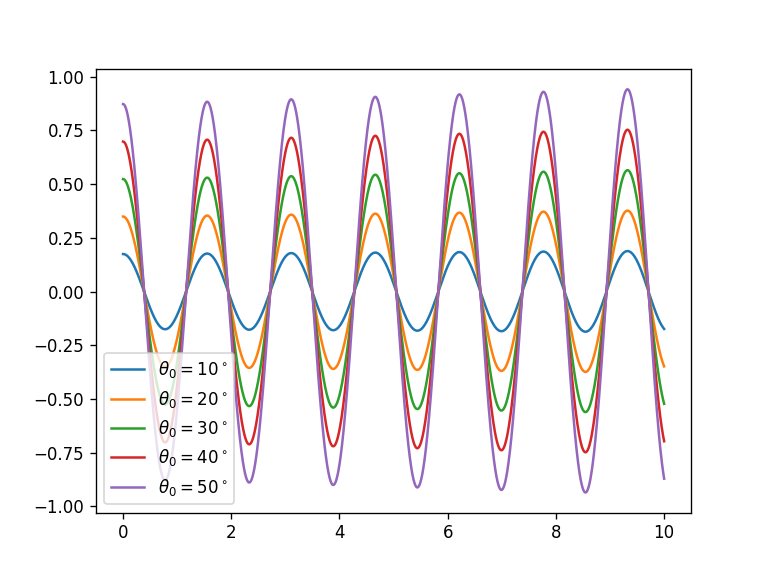

In [5]:

plt.figure("euler2")
plt.clf()
for theta0 in range(10,51,10):
    t,theta,thetap = euler1(theta0,0,10,0.001)
    plt.plot(t,theta,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


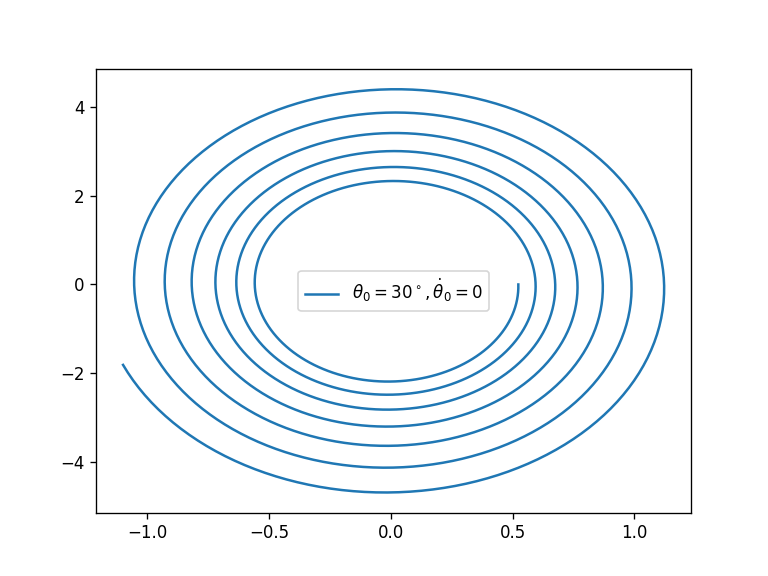

In [6]:
plt.figure("portrait de phase")
plt.clf()
t,theta,thetap = euler1(30,0,10,0.01)
plt.plot(theta,thetap,label=r"$\theta_0 = 30^\circ, \dot{\theta}_0 = 0$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


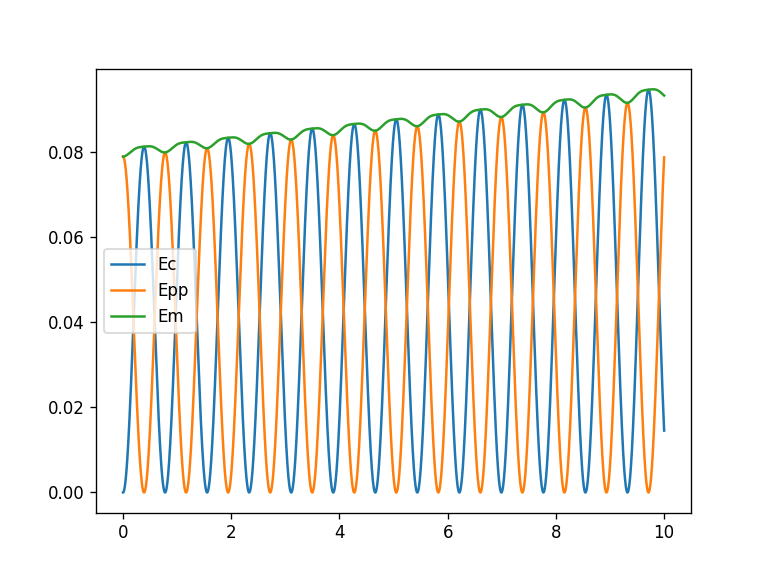

In [7]:
plt.figure("energie")
plt.clf()
t,theta,thetap = euler1(30,0,10,0.001)
Ec = [0.5*0.1*0.6**2*val**2 for val in thetap]
Epp = [0.1*9.81*(0.6 - 0.6*cos(val)) for val in theta]
Em = [x+y for x,y in zip(Ec,Epp)]
plt.plot(t,Ec,label="Ec")
plt.plot(t,Epp,label='Epp')
plt.plot(t,Em,label='Em')
plt.legend()
plt.show()

5. Répondre aux questions 1 à 4 sans l’approximation des petits angles maintenant. Discuter de l’isochronisme des oscillations.

<IPython.core.display.Javascript object>


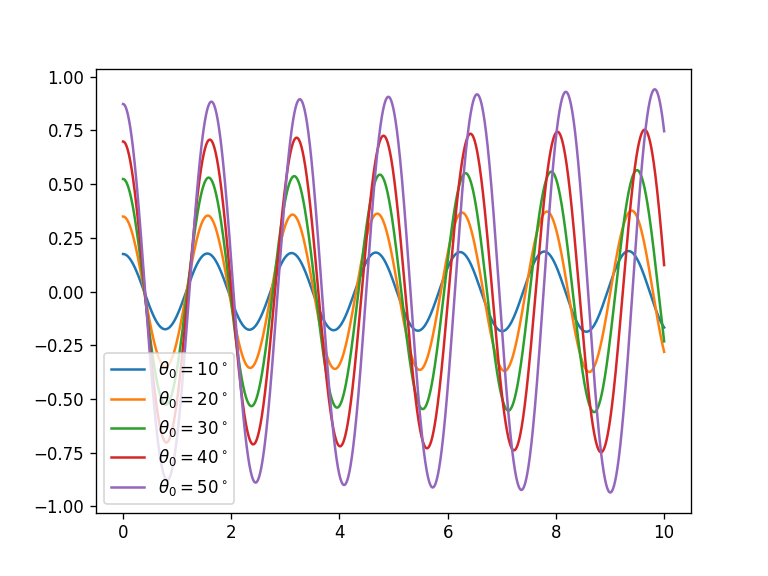

In [8]:
def euler2(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    l = 0.6
    w0 = (g / l)**0.5
    
    while t[-1] < tmax:
        theta.append(theta[-1] + thetap[-1]*dt)
        thetap.append(thetap[-1] - w0**2*sin(theta[-2])*dt)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("euler - 10 à 50°")
plt.clf()
for theta0 in range(10,51,10):
    t,theta,thetap = euler2(theta0,0,10,0.001)
    plt.plot(t,theta,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


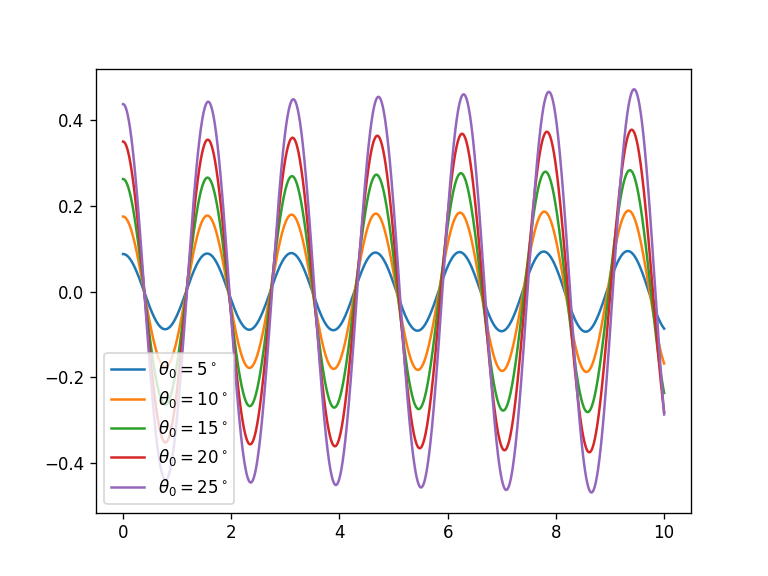

In [9]:
plt.figure("euler - 5 à 25°")
plt.clf()
for theta0 in range(5,26,5):
    t,theta,thetap = euler2(theta0,0,10,0.001)
    plt.plot(t,theta,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

6. Réaliser la même étude en utilisant le schéma de Heun
7. Même question (toujours sans ressorts et frottements) en utilisant le schéma de Verlet (ci-dessous)
$$f(t + dt) = f(t) + dt f'(t) + \frac{dt^2}{2} f''(t)$$
$$f'(t+dt) = f'(t) + \frac{dt}{2}(f''(t) + f''(t+dt))$$


<IPython.core.display.Javascript object>


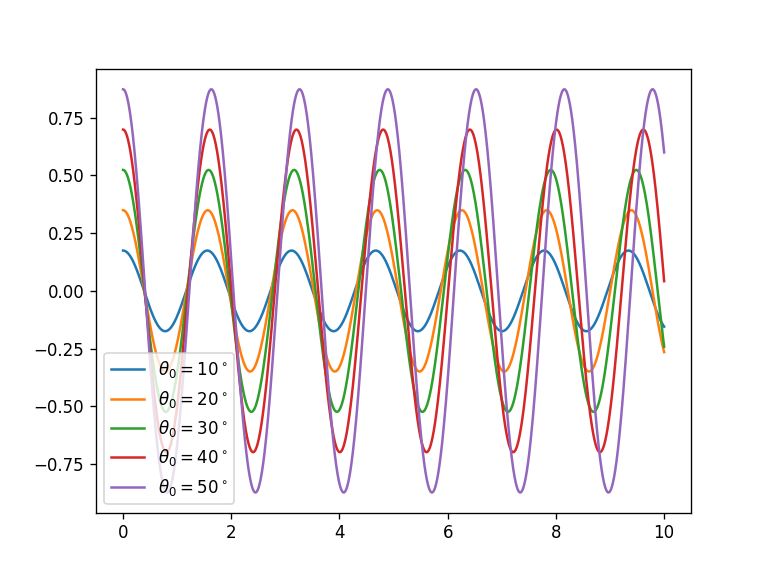

In [10]:
def heun(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    l = 0.6
    w0 = (g / l)**0.5
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] - w0**2*sin(theta[-1])*dt
        theta.append(theta[-1] + (thetap[-1]+thetapeuler)*dt/2)
        thetap.append(thetap[-1] +(- w0**2*sin(theta[-2]) - w0**2*sin(theta[-1]))*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("heun")
plt.clf()
for theta0 in range(10,51,10):
    t,theta,thetap = heun(theta0,0,10,0.001)
    plt.plot(t,theta,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


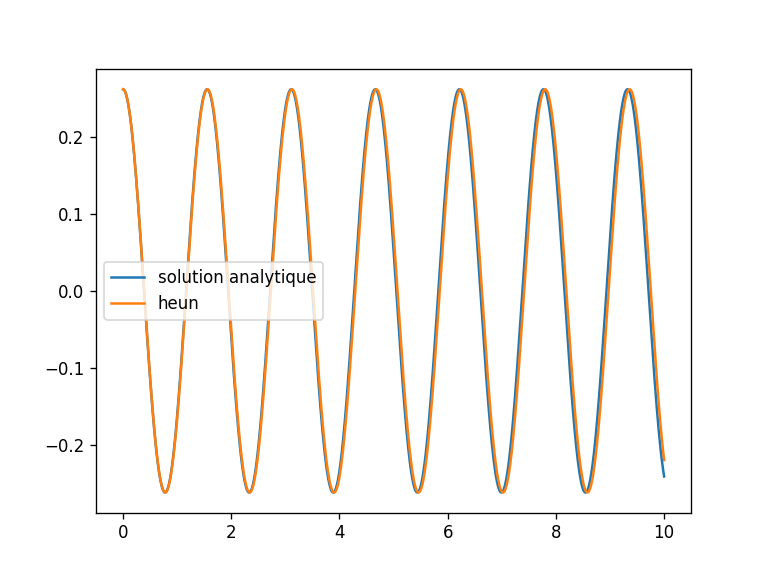

In [11]:
t,theta,thetap = heun(15,0,10,0.001)

sol = []
for val in t:
    sol.append(theta[0]*cos((9.81/0.6)**0.5*val))

plt.figure("heun2")
plt.clf()
plt.plot(t,sol,label="solution analytique")
plt.plot(t,theta,label="heun")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


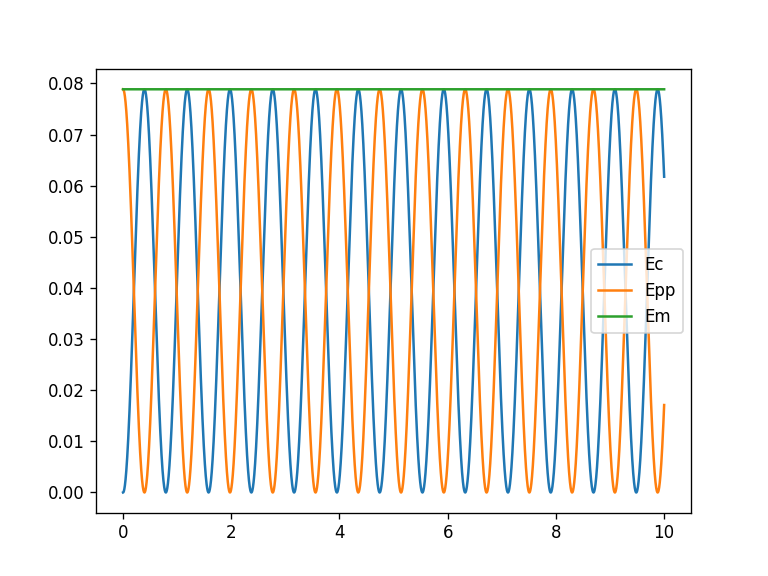

In [12]:
plt.figure("energie2")
plt.clf()
t,theta,thetap = heun(30,0,10,0.001)
Ec = [0.5*0.1*0.6**2*val**2 for val in thetap]
Epp = [0.1*9.81*(0.6 - 0.6*cos(val)) for val in theta]
Em = [x+y for x,y in zip(Ec,Epp)]
plt.plot(t,Ec,label="Ec")
plt.plot(t,Epp,label='Epp')
plt.plot(t,Em,label='Em')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


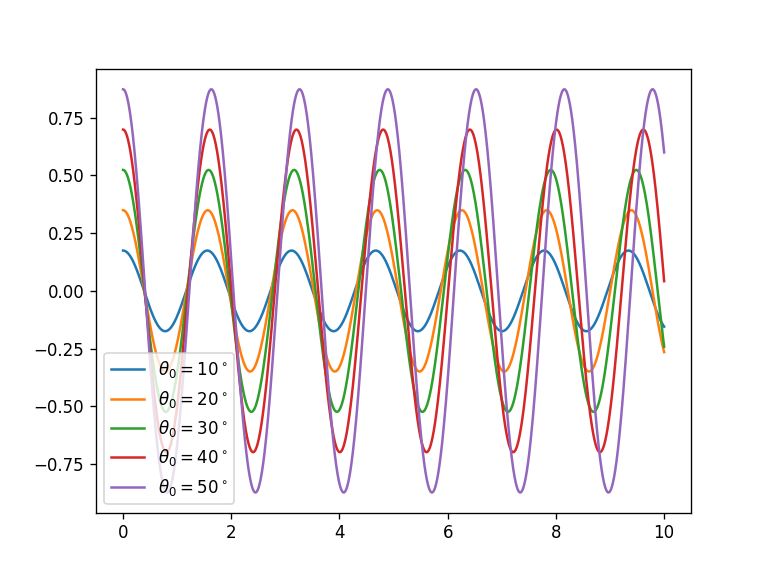

In [13]:
def verlet(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    l = 0.6
    w0 = (g / l)**0.5
    
    while t[-1] < tmax:
        theta.append(theta[-1] + thetap[-1]*dt -w0**2*sin(theta[-1])*dt**2/2)
        thetap.append(thetap[-1] +(- w0**2*sin(theta[-2]) - w0**2*sin(theta[-1]))*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("verlet")
plt.clf()
for theta0 in range(10,51,10):
    t,theta,thetap = verlet(theta0,0,10,0.001)
    plt.plot(t,theta,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


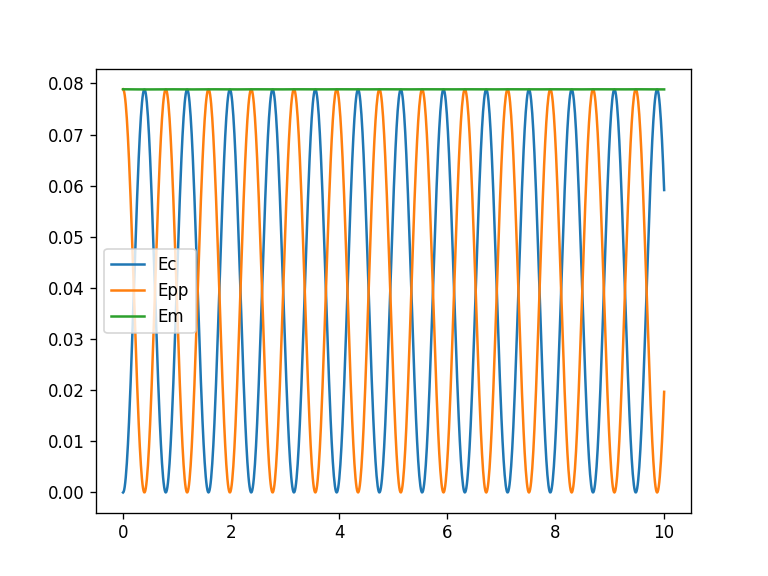

In [14]:
plt.figure("energie3")
plt.clf()
t,theta,thetap = verlet(30,0,10,0.01)
Ec = [0.5*0.1*0.6**2*val**2 for val in thetap]
Epp = [0.1*9.81*(0.6 - 0.6*cos(val)) for val in theta]
Em = [x+y for x,y in zip(Ec,Epp)]
plt.plot(t,Ec,label="Ec")
plt.plot(t,Epp,label='Epp')
plt.plot(t,Em,label='Em')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


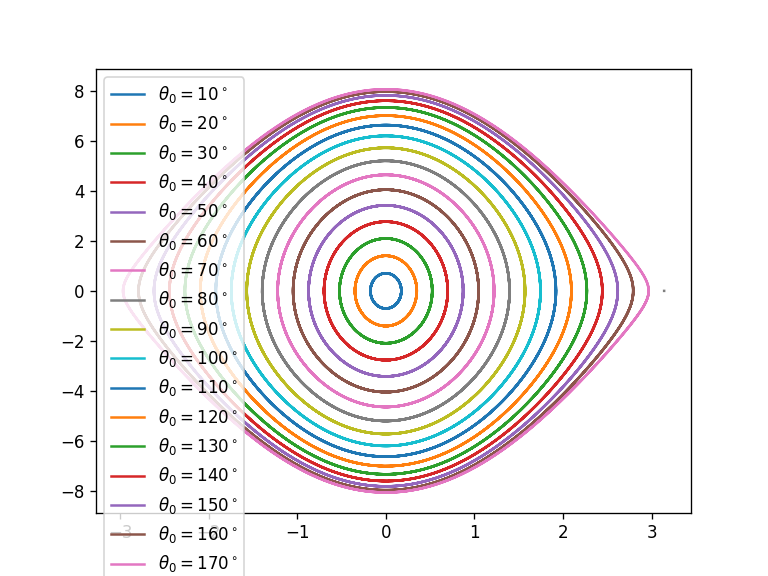

In [15]:
plt.figure("phases verlet")
plt.clf()
for theta0 in range(10,181,10):
    t,theta,thetap = verlet(theta0,0,10,0.001)
    plt.plot(theta,thetap,label=r"$\theta_0 = {}^\circ$".format(theta0))
plt.legend()
plt.show()

8. On introduit des frottements en $\frac{1}{2}\rho v^2 S Cx$ avec Cx = 0,44 et Rbille =  2 cm et une masse volumique de l’air à 1,225 kg.m-3. Proposer une simulation du phénomène. Que se passe-t-il si l amasse baisse et le rayon de la sphère augmente ?

$m l \ddot{\theta} = - m g sin(\theta) - \frac{1}{2}\rho l^2 \dot{\theta} |\dot{\theta}| S Cx$
d'où  
  
$\ddot{\theta} = - \frac{g}{l} sin(\theta) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta} |\dot{\theta}| S Cx$  
  
  
On décompose en un système de deux équations en $\theta$ et $\dot{\theta}$  
  
  
$\left\{
\begin{array}{ll}
    \frac{d \theta}{dt} = \dot{\theta}  \\
    \frac{d \dot{\theta}}{dt} = \ddot{\theta} = - \frac{g}{l} sin(\theta) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta} |\dot{\theta}| S Cx
\end{array}
\right.$

  
La méthode de Heun nous donne
$\left\{
\begin{array}{ll}
    \theta_{i+1} - \theta_i = (\dot{\theta}_i +\dot{\theta}_{i+1})\times \frac{dt}{2}  \\
    \dot{\theta}_{i+1} - \dot{\theta}_i = (-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx -\frac{g}{l} sin(\theta_{i+1}) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta_{i+1}} |\dot{\theta_{i+1}}| S Cx)\times \frac{dt}{2}
\end{array}
\right.$


Or $\dot{\theta}_{i+1}$ n'est pas accessible pour le calcul de $\dot{\theta}_{i+1}$ et de $\theta_{i+1}$. Il faut donc le calculer de manière intermédiaire par la méthode d'Euler (sans conserver la valeur). 

Le schéma est donc:  
  
$\begin{array}{ll}
    (1)\ \dot{\theta}_{euler} = \dot{\theta}_i + (-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx)\times dt \\
    (2)\ \theta_{i+1} = \theta_i + (\dot{\theta}_i +\dot{\theta}_{euler})\times \frac{dt}{2}  \\
    (3)\ \dot{\theta}_{i+1} = \dot{\theta}_i + (-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx -\frac{g}{l} sin(\theta_{euler}) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta_{euler}} |\dot{\theta_{euler}}| S Cx)\times \frac{dt}{2}
\end{array}$

<IPython.core.display.Javascript object>


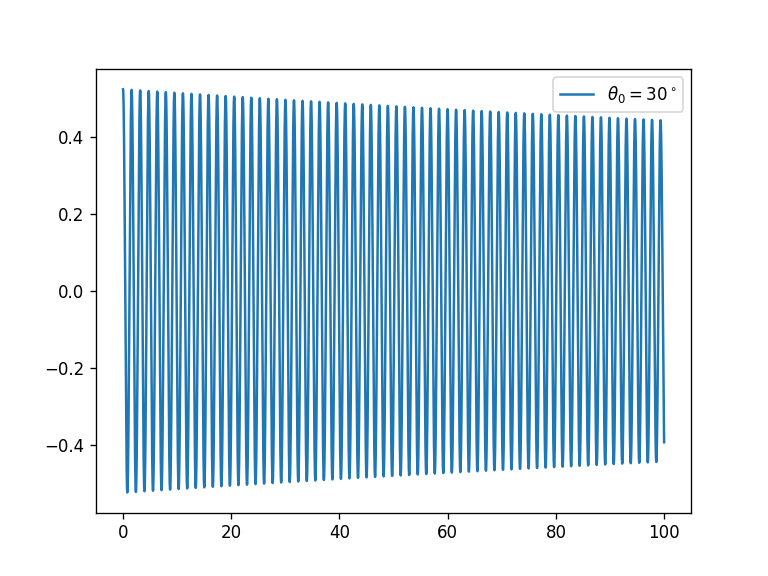

In [35]:
#Méthode de Heun
#bille métallique 2cm  de rayon, 100g, dans l'air
def heun3(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1.225
    l = 0.6
    m = 0.1
    R = 0.02
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + (thetap[-1]+thetapeuler)*dt/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("heun3")
plt.clf()
t,theta,thetap = heun3(30,0,100,0.0001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


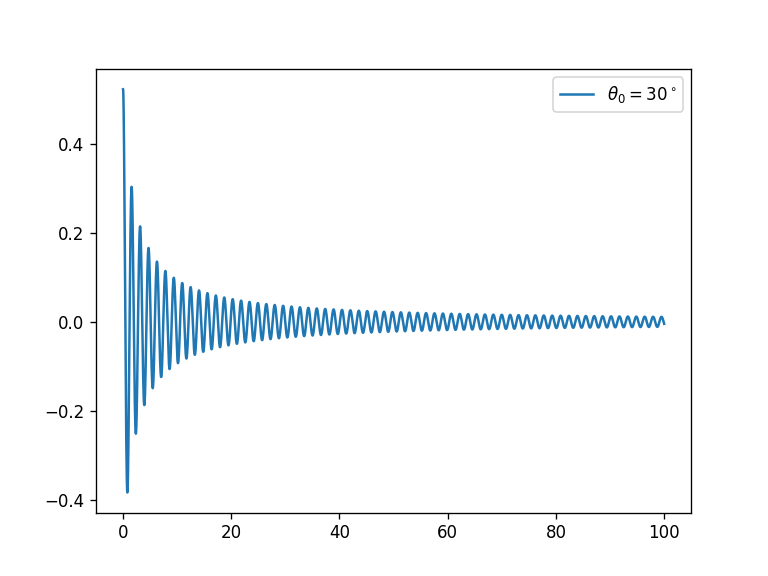

In [34]:
#Méthode de Heun
#bille polystyrene 10cm  de rayon, 10g, dans l'air
def heun4(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1.225
    l = 0.6
    m = 0.01
    R = 0.1
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + (thetap[-1]+thetapeuler)*dt/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("heun4")
plt.clf()
t,theta,thetap = heun4(30,0,100,0.0001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


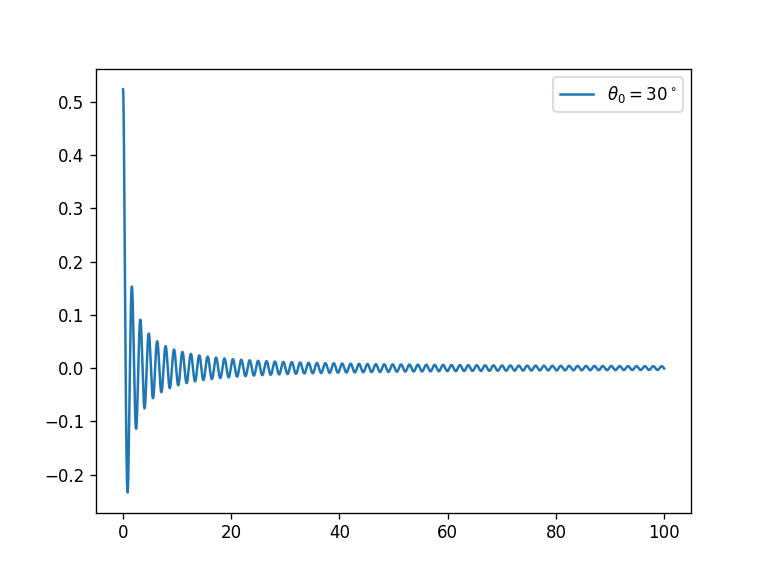

In [33]:
#Méthode de Heun
#bille métallique 2cm  de rayon, 100g, dans l'eau
def heun5(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1000.
    l = 0.6
    m = 0.1
    R = 0.02
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + (thetap[-1]+thetapeuler)*dt/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("heun5")
plt.clf()
t,theta,thetap = heun5(30,0,100,0.001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

$$f(t + dt) = f(t) + dt f'(t) + \frac{dt^2}{2} f''(t)$$
$$f'(t+dt) = f'(t) + \frac{dt}{2}(f''(t) + f''(t+dt))$$


  
$\left\{
\begin{array}{ll}
    \frac{d \theta}{dt} = \dot{\theta}  \\
    \frac{d \dot{\theta}}{dt} = \ddot{\theta} = - \frac{g}{l} sin(\theta) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta} |\dot{\theta}| S Cx
\end{array}
\right.$

  
La méthode de Verlet nous donne
$\left\{
\begin{array}{ll}
    \theta_{i+1} = \theta_i + \dot{\theta}_i dt + \left(-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx \right)\times  \frac{dt^2}{2}  \\
    \dot{\theta}_{i+1} = \dot{\theta}_i + (-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx -\frac{g}{l} sin(\theta_{i+1}) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta_{i+1}} |\dot{\theta_{i+1}}| S Cx)\times \frac{dt}{2}
\end{array}
\right.$


Or $\dot{\theta}_{i+1}$ n'est pas accessible pour le calcul de $\dot{\theta}_{i+1}$. Il faut donc le calculer de manière intermédiaire par la méthode d'Euler (sans conserver la valeur). 

Le schéma est donc:  
  
$\begin{array}{ll}
    (1)\ \dot{\theta}_{euler} = \dot{\theta}_i + (-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx)\times dt \\
    (2)\ \theta_{i+1} = \theta_i + \dot{\theta}_i dt +(-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx)\times  \frac{dt^2}{2}  \\
    (3)\ \dot{\theta}_{i+1} = \dot{\theta}_i + \big(-\frac{g}{l} sin(\theta_i) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_i |\dot{\theta}_i| S Cx -\frac{g}{l} sin(\theta_{i+1}) - \frac{1}{2}\rho \frac{l}{m} \dot{\theta}_{euler} |\dot{\theta}_{euler}| S Cx\big)\times \frac{dt}{2}
\end{array}$

<IPython.core.display.Javascript object>


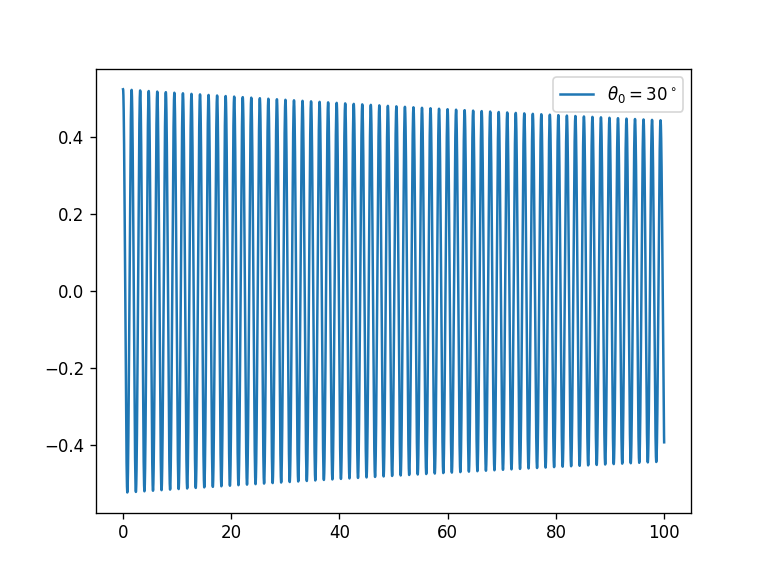

In [31]:
#Méthode de verlet
#bille métallique 2cm  de rayon, 100g, dans l'air
def verlet3(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1.225
    l = 0.6
    m = 0.1
    R = 0.02
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + thetap[-1]*dt + 
                     (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt**2/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("verlet3")
plt.clf()
t,theta,thetap = verlet3(30,0,100,0.001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


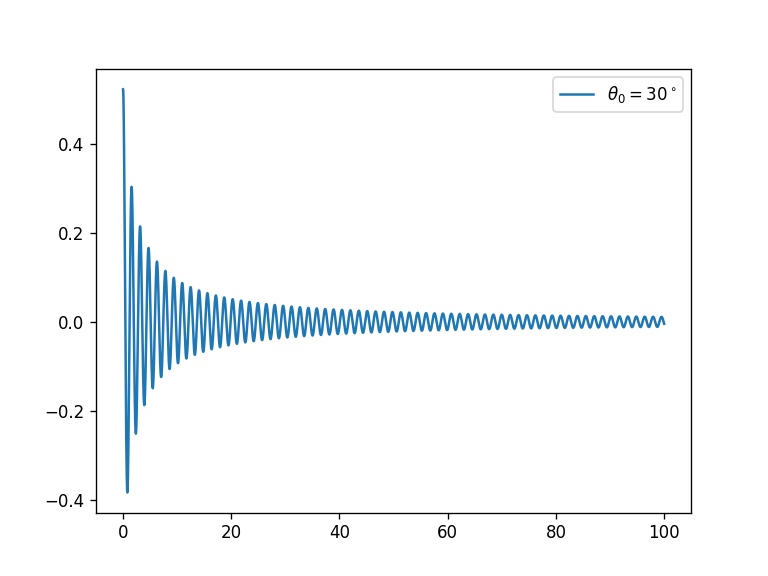

In [36]:
#Méthode de verlet
#bille 10cm  de rayon, 10g, dans l'air
def verlet4(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1.225
    l = 0.6
    m = 0.01
    R = 0.1
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + thetap[-1]*dt + 
                     (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt**2/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("verlet4")
plt.clf()
t,theta,thetap = verlet4(30,0,100,0.001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


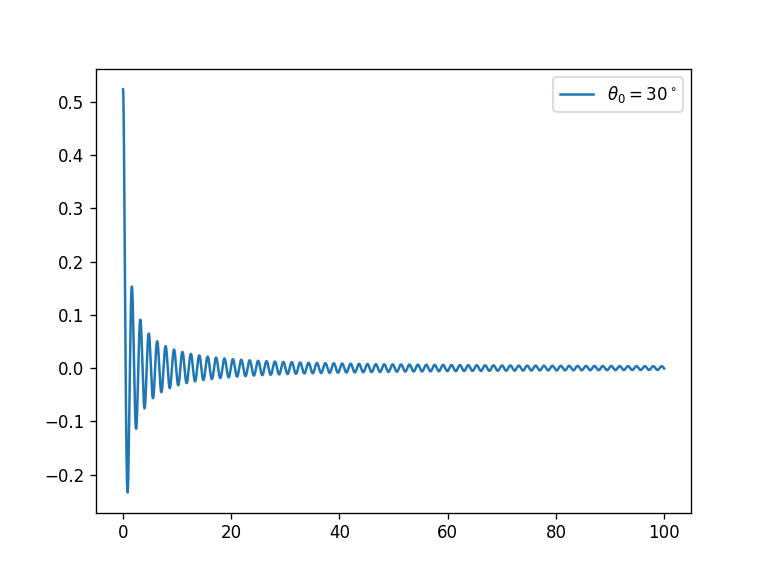

In [37]:
#Méthode de verlet
#bille métallique 2cm  de rayon, 100g, dans l'eau
def verlet5(theta0, thetap0, tmax, dt):
    theta = [theta0 * pi / 180] # theta en rad
    thetap = [thetap0]
    t = [0]
    g = 9.81
    rho = 1000.
    l = 0.6
    m = 0.1
    R = 0.02
    S = pi*R**2
    Cx = 0.44
    
    
    while t[-1] < tmax:
        thetapeuler = thetap[-1] + (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt
        theta.append(theta[-1] + thetap[-1]*dt + 
                     (- g/l*sin(theta[-1]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx)*dt**2/2)
        thetap.append(thetap[-1] + (- g/l*sin(theta[-2]) - 0.5*rho*l/m*thetap[-1]*abs(thetap[-1])*S*Cx
                                    - g/l*sin(theta[-1]) - 0.5*rho*l/m*thetapeuler*abs(thetapeuler)*S*Cx)*dt/2)
        t.append(t[-1] + dt)
        
    return t, theta, thetap

plt.figure("verlet5")
plt.clf()
t,theta,thetap = verlet5(30,0,100,0.001)
plt.plot(t,theta,label=r"$\theta_0 = 30^\circ$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


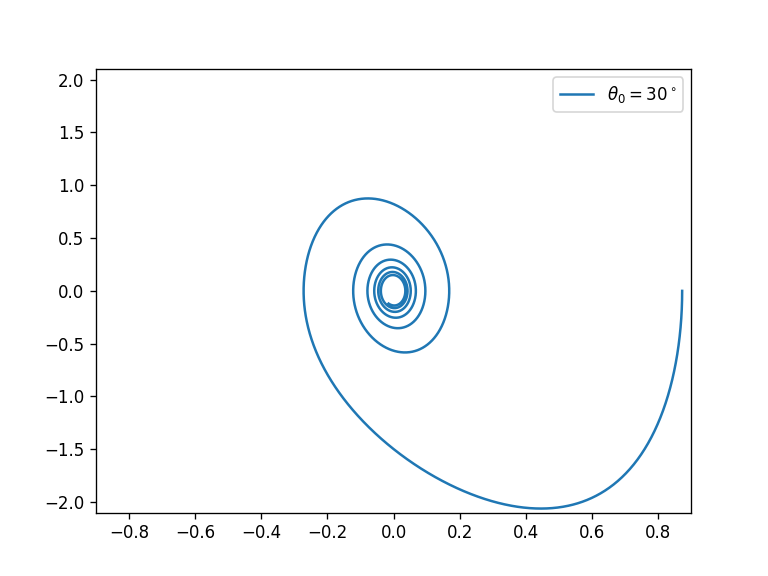

In [43]:
plt.figure("verlet5 - phase")
plt.clf()
t,theta,thetap = verlet5(50,0,10,0.001)
plt.plot(theta,thetap,label=r"$\theta_0 = 30^\circ$")
plt.xlim([-0.9,0.9])
plt.ylim([-2.1,2.1])
plt.legend()
plt.show()

## Pour les plus rapides:
9. On introduit maintenant des ressorts (et on garde les frottements). En utilisant la méthode d’Euler, puis celle de Heun tracer la valeur de l’angle Théta en fonction du temps. On prendra l = 0,6 m, m = 100 g, k = 10 N/m (pour les deux ressorts) et l0 = 20 cm. On prendra theta0 = 15°
10. Modéliser dans le cas où les deux ressorts sont différents, k1 = 10 N/m et k2 = 20 N/m.
11. On introduit maintenant une barre métallique à mi-hauteur de manière à ce que sur la partie droite l = 20cm et sur la partie gauche l = 10cm. On considère les frottements (mais pas les ressorts). Modéliser la situation et déterminer la période pour différentes valeurs de l angle theta0.